In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import MCMC
from numpyro.infer.hug import Hug

In [2]:
def normal(D, mu, sigma):
    with numpyro.plate('D', D):
        theta = numpyro.sample('theta', dist.Normal(mu, sigma))

In [3]:
kernel = Hug(normal, step_size=1, trajectory_length=1)
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, D=2, mu=0, sigma=1.0, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:00<00:00, 1247.54it/s]


In [4]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  theta[0]     -0.00      0.06      0.00     -0.08      0.08    926.73      1.00
  theta[1]     -0.00      0.06     -0.01     -0.08      0.08   1017.73      1.00



In [5]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[-0.02709655, -0.07442749],
              [ 0.00984901,  0.07859181],
              [-0.05001482,  0.06141824],
              ...,
              [-0.04687464,  0.06384906],
              [ 0.07598531,  0.0223645 ],
              [-0.05338115,  0.05851841]], dtype=float32)}

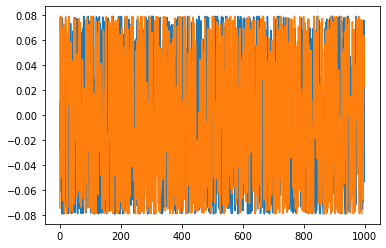

In [6]:
plt.plot(samples["theta"])

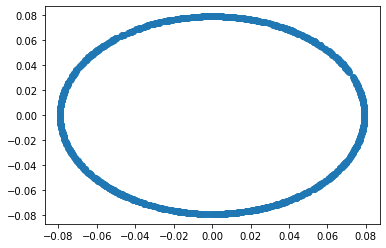

In [7]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

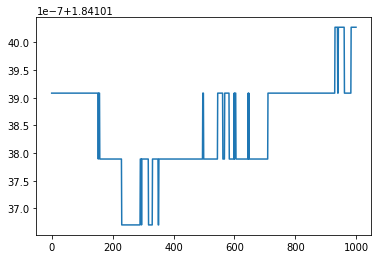

In [8]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

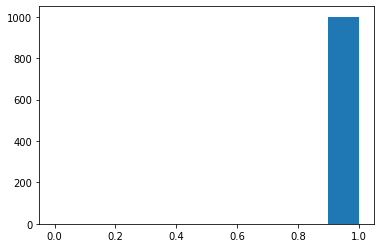

In [9]:
plt.hist(ap, range=(0,1))

# Diagonal covariance

In [10]:
sig = np.array([1, 5])

kernel = Hug(normal, step_size=1, trajectory_length=1, covar=np.diag(sig**2))
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
mcmc.run(rng_key, D=2, mu=0, sigma=sig, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:00<00:00, 1329.64it/s]


In [11]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  theta[0]     -0.00      0.01     -0.00     -0.02      0.02    972.68      1.00
  theta[1]     -0.00      0.07     -0.01     -0.10      0.10   1027.13      1.00



In [12]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[-0.01629001, -0.06536579],
              [-0.00582278,  0.10029531],
              [-0.00705361,  0.09830046],
              ...,
              [ 0.01250757, -0.08360386],
              [-0.0191493 , -0.04163122],
              [ 0.01306683, -0.08143902]], dtype=float32)}

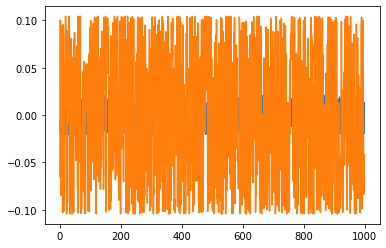

In [13]:
plt.plot(samples["theta"])

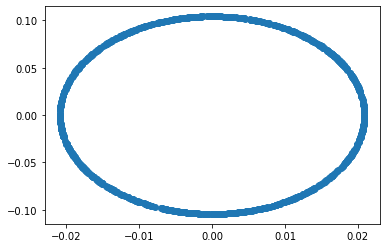

In [14]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

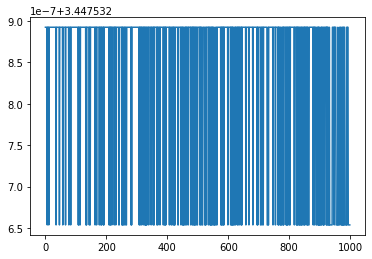

In [15]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

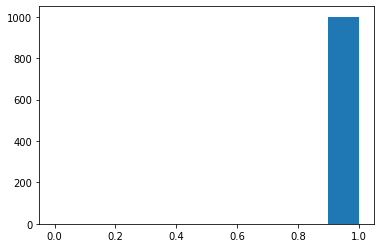

In [16]:
plt.hist(ap, range=(0,1))